# KNN Regressor using Wi-Fi and Bluetooth data

### Experiments which aims to explore the ML algorithm K-Nearest Neighbors as a Regressor algorithm using the Wi-Fi and BLE technologies moreover using the strength of the signal as a basis 

### Imports
Imports of the libraries to be used throughout the experiments

In [1]:
#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  accuracy_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
import sklearn
import scipy

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
from pandas.plotting import scatter_matrix

plt.style.use('seaborn-whitegrid')

#Additional Helper Libraries
from operator import itemgetter
import re

<Figure size 432x288 with 0 Axes>

### Load File
Function that allows to load a file from disk

In [2]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

### Replace 0 with Nan RSSI Values

In [3]:
def replace_features_nan(dataset,position):
    dataset.iloc[:,position:] = dataset.iloc[:,position:].replace(0,np.nan)
    return dataset

### Initialize Dataset

In [4]:
dataset = load_file('../radiomapBluetoothWiFiclassifier_university_dataset.csv')
dataset = replace_features_nan(dataset,4)
display(dataset)
display(dataset.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.0,-65.0,-63.0,-76.0,-78.0,-79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.0,-61.0,-62.0,-77.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.0,-62.0,-62.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.0,-61.0,-63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.0,-61.0,-63.0,-76.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-90.0,-89.0,NaN,NaN,NaN,-90.0,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-88.0,NaN,NaN,NaN,NaN,-90.0,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-89.0,-90.0,NaN,NaN,NaN,-90.0,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-91.0,-89.0,NaN,NaN,NaN,NaN,-93.0,-84.0,-93


(750, 37)

### Initialize Test Set (Home | BLE)

In [5]:
test_dataset_ble  = load_file('../radiomap_home_BluetoothWiFi.csv')
test_dataset_ble  = replace_features_nan(test_dataset_ble,3)
display(test_dataset_ble)
display(test_dataset_ble.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,c4:e9:84:42:ac:ff,00:06:91:d4:77:00,00:06:91:d4:77:02,8c:5b:f0:78:a1:d6,1c:ab:c0:df:99:c8,1c:ab:c0:df:99:c9,00:26:5b:d1:93:38,00:26:5b:d1:93:39,00:fc:8d:cf:98:08,00:fc:8d:cf:98:09,bc:4d:fb:52:ea:28,bc:4d:fb:52:ea:29,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,524,-2.0,0.5,-69.0,-68.0,-69.0,-72.0,-73.0,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,-87.0,-90.0,-83.0
1,525,-2.0,0.5,-70.0,-66.0,-66.0,-70.0,-73.0,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,-88.0,-87.0,-76.0
2,526,-2.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,527,-2.0,0.5,-65.0,-66.0,-66.0,-70.0,NaN,-68.0,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-87.0,-81.0
4,528,-2.0,0.5,-66.0,-66.0,-66.0,-71.0,NaN,-68.0,NaN,NaN,NaN,NaN,NaN,NaN,-92.0,-91.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,649,-2.0,-1.5,-65.0,-68.0,-68.0,NaN,-71.0,-71.0,-75.0,-75.0,NaN,NaN,-76.0,NaN,-87.0,-76.0,NaN
126,650,-2.0,-1.5,-66.0,-67.0,-64.0,NaN,-71.0,-71.0,-75.0,-75.0,NaN,NaN,-77.0,-79.0,-88.0,-80.0,NaN
127,651,-2.0,-1.5,-65.0,-68.0,-66.0,NaN,-71.0,-71.0,-75.0,-75.0,NaN,NaN,-77.0,-79.0,-96.0,-76.0,NaN
128,652,-2.0,-1.5,-65.0,-68.0,-66.0,NaN,-72.0,-71.0,-75.0,-75.0,NaN,NaN,-77.0,-79.0,-86.0,-76.0,NaN


(130, 18)

In [6]:
test_dataset_home_ble = load_file('../radiomap_home_Bluetooth.csv')
test_dataset_home_ble = replace_features_nan(test_dataset_home_ble,3)
display(test_dataset_home_ble)
display(test_dataset_home_ble.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,390,-2.0,0.5,-92,-81,NaN
1,391,-2.0,0.5,-84,-80,NaN
2,392,-2.0,0.5,-84,-85,NaN
3,393,-2.0,0.5,-84,-84,NaN
4,394,-2.0,0.5,-90,-81,NaN
...,...,...,...,...,...,...
125,516,-2.0,-1.5,-80,-88,NaN
126,517,-2.0,-1.5,-81,-90,NaN
127,518,-2.0,-1.5,-80,-88,NaN
128,519,-2.0,-1.5,-81,-87,NaN


(130, 6)

### Dataset Overall Info

In [7]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fingerprint ID     750 non-null    int64  
 1   coordinate_X       750 non-null    float64
 2   coordinate_Y       750 non-null    float64
 3   zone               750 non-null    object 
 4   f0:5c:19:94:1a:40  630 non-null    float64
 5   f0:5c:19:94:1a:41  634 non-null    float64
 6   f0:5c:19:94:1a:42  635 non-null    float64
 7   34:fc:b9:18:e4:c1  189 non-null    float64
 8   34:fc:b9:18:e4:c0  145 non-null    float64
 9   34:fc:b9:18:e4:c2  178 non-null    float64
 10  f0:5c:19:94:1a:50  664 non-null    float64
 11  f0:5c:19:94:1a:51  699 non-null    float64
 12  f0:5c:19:94:1a:52  738 non-null    float64
 13  4c:ed:fb:5a:5c:0c  712 non-null    float64
 14  4c:ed:fb:5a:5c:08  682 non-null    float64
 15  f0:5c:19:94:19:e1  343 non-null    float64
 16  f0:5c:19:94:19:e2  280 non

None

### File Overall Description
Usage of describe pandas function on the dataset

In [8]:
display(dataset.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Fingerprint ID,750.0,639.980000,217.460567,265.0,452.25,639.5,826.75,1026.0
coordinate_X,750.0,0.000000,1.415157,-2.0,-1.00,0.0,1.00,2.0
coordinate_Y,750.0,1.000000,1.415157,-1.0,0.00,1.0,2.00,3.0
f0:5c:19:94:1a:40,630.0,-65.284127,3.983300,-76.0,-68.00,-65.0,-62.00,-56.0
f0:5c:19:94:1a:41,634.0,-63.529968,3.464086,-71.0,-66.00,-64.0,-62.00,-48.0
f0:5c:19:94:1a:42,635.0,-64.628346,3.965205,-76.0,-68.00,-64.0,-61.00,-56.0
34:fc:b9:18:e4:c1,189.0,-78.380952,3.702049,-86.0,-81.00,-78.0,-76.00,-70.0
34:fc:b9:18:e4:c0,145.0,-80.255172,4.808527,-92.0,-84.00,-79.0,-77.00,-71.0
34:fc:b9:18:e4:c2,178.0,-81.410112,4.828740,-92.0,-86.00,-81.0,-78.00,-70.0
f0:5c:19:94:1a:50,664.0,-78.664157,3.975435,-89.0,-81.25,-79.0,-76.00,-69.0


### % of Missing Values

In [9]:
def compute_missing_values(dataset): 
    missing_values = dataset.isnull().sum()
    missing_values_dataset = pd.DataFrame(missing_values,columns=['Missing Values'])
    total_amount = dataset.count() + dataset.isnull().sum()
    total_pd = pd.DataFrame(total_amount,columns=['Samples'])
    missing_percentage = (dataset.isnull().sum() / (dataset.count() + dataset.isnull().sum()))
    missing_percentage_dataset = pd.DataFrame(missing_percentage,columns=['% of Missing Values'])
    missing_dataset = missing_values_dataset.join(total_pd).join(missing_percentage_dataset)
    display(missing_dataset)
    return missing_dataset

In [10]:
missing_dataset = compute_missing_values(dataset)

,Missing Values,Samples,% of Missing Values
Fingerprint ID,0,750,0.000000
coordinate_X,0,750,0.000000
coordinate_Y,0,750,0.000000
zone,0,750,0.000000
f0:5c:19:94:1a:40,120,750,0.160000
f0:5c:19:94:1a:41,116,750,0.154667
f0:5c:19:94:1a:42,115,750,0.153333
34:fc:b9:18:e4:c1,561,750,0.748000
34:fc:b9:18:e4:c0,605,750,0.806667
34:fc:b9:18:e4:c2,572,750,0.762667


### Overall Histogram of dataset atributes

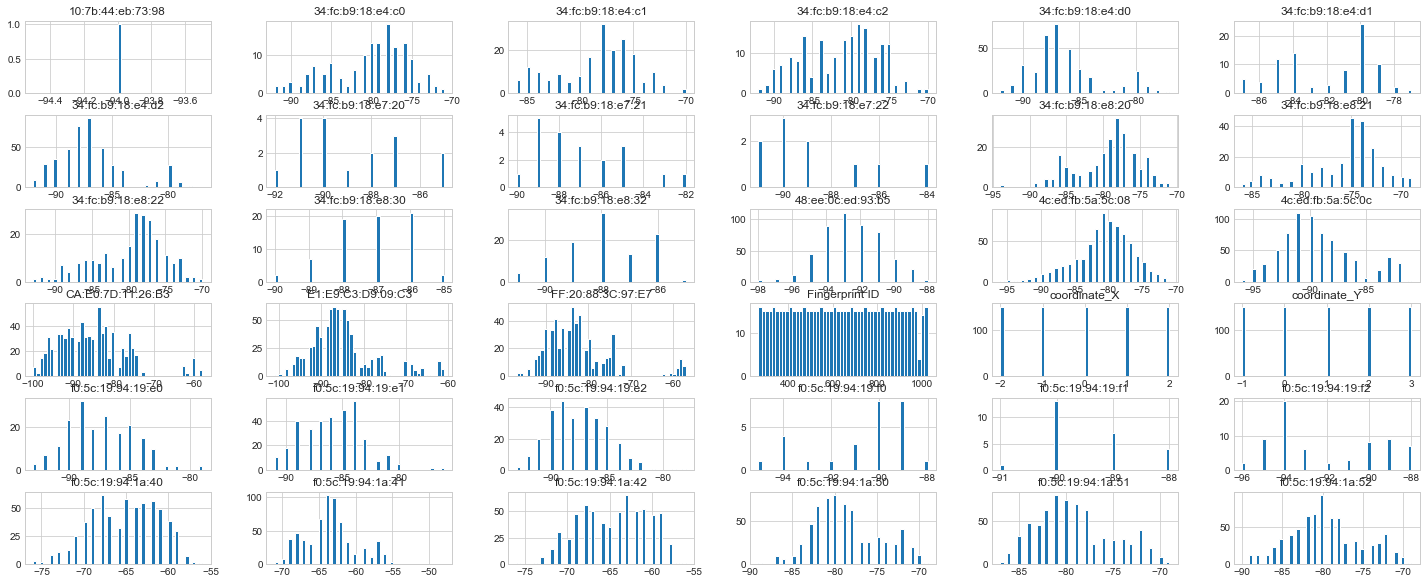

In [11]:
dataset.hist(bins=50,figsize=(25,10))
plt.show()

### Target Attribute - Reference Points
Graphical display of the reference points scanned in the experiment

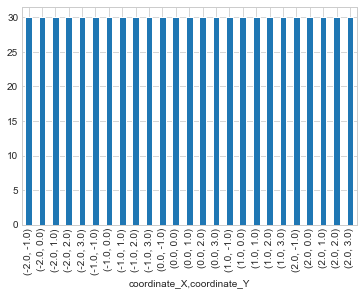

In [12]:
reference_points = dataset.groupby(['coordinate_X','coordinate_Y'])
reference_points.size().plot(kind="bar")

### Access Points Graphical Display

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,34:fc:b9:18:e4:d1,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1
0,-62.0,-65.0,-63.0,-76.0,-78.0,-79.0,-80.0,-80.0,-80.0,-89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-62.0,-61.0,-62.0,-77.0,-78.0,-78.0,-80.0,-81.0,-80.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-63.0,-62.0,-62.0,NaN,NaN,NaN,-80.0,-79.0,-80.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-63.0,-61.0,-63.0,NaN,NaN,NaN,-81.0,-81.0,-81.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-63.0,-61.0,-63.0,-76.0,-78.0,-78.0,-80.0,-80.0,-81.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,NaN,NaN,NaN,NaN,NaN,NaN,-71.0,-73.0,-73.0,-83.0,...,NaN,NaN,NaN,NaN,-90.0,-89.0,NaN,NaN,NaN,-90.0
746,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,-74.0,-73.0,-83.0,...,-86.0,NaN,NaN,NaN,-88.0,NaN,NaN,NaN,NaN,-90.0
747,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,-73.0,-73.0,-83.0,...,NaN,NaN,NaN,NaN,-89.0,-90.0,NaN,NaN,NaN,-90.0
748,NaN,NaN,NaN,NaN,NaN,NaN,-74.0,-72.0,-73.0,-83.0,...,-85.0,NaN,NaN,NaN,-91.0,-89.0,NaN,NaN,NaN,NaN


<BarContainer object of 30 artists>

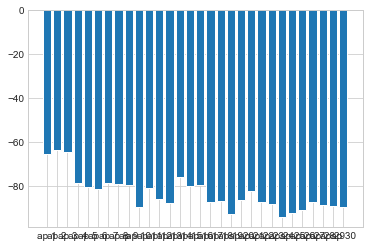

In [13]:
count_aps = {}
counter = 1
first_beacon_index = -1
for ap in dataset.iloc[:,4:]:
    if ap.isupper() == True:
        first_beacon_index = list(dataset).index(ap)
        break
    mean_value = dataset[ap].mean()
    count_aps['ap ' + str(counter)] = mean_value
    counter = counter + 1
display(dataset.iloc[:,4:first_beacon_index])
plt.bar(range(len(count_aps)),list(count_aps.values()),align='center',tick_label=list(count_aps.keys()))

### Beacons Graphical Display
Graphical display with the average strength signal transmitted by each beacon

,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-86.0,-88.0,-96
1,-96.0,-88.0,-96
2,-94.0,-92.0,-98
3,-92.0,-89.0,-96
4,-96.0,-89.0,-93
...,...,...,...
745,-95.0,-84.0,-95
746,-94.0,-83.0,-92
747,-92.0,-84.0,-91
748,-93.0,-84.0,-93


<BarContainer object of 3 artists>

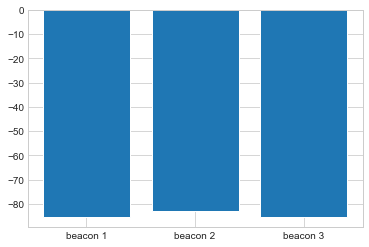

In [14]:
count_beacons = {}
counter = 1
beacons = dataset.iloc[:,first_beacon_index:]
display(beacons)
for beacon in beacons:
    mean_value = dataset[beacon].mean()
    count_beacons['beacon ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_beacons)),list(count_beacons.values()),align='center',tick_label=list(count_beacons.keys()))

### Signal Strength Distribution Display
Graphical display of the distribution of the signal strength

#### Wifi Signal Strength

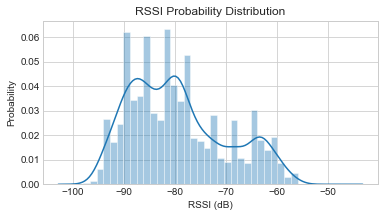

In [15]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')
sns.distplot(dataset.iloc[:,4:first_beacon_index])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

#### Bluetooth Signal Strength

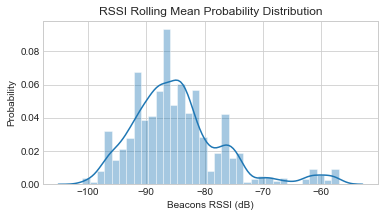

In [16]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Rolling Mean Probability Distribution')
# The KDE plot for the Rolling Mean column
sns.distplot(dataset.iloc[:,first_beacon_index:])
# The X Label
plt.xlabel('Beacons RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Correlations
Check how much each attribute collerates with each other. Values range from -1 to 1. Close to 1 means a strong positive correlation.

In [17]:
def compute_correlations(dataset):
    corr_matrix = dataset.corr()
    display(corr_matrix)

In [18]:
compute_correlations(dataset)

,Fingerprint ID,coordinate_X,coordinate_Y,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
Fingerprint ID,1.000000,0.366251,-0.566946,0.032462,0.242338,0.033822,-0.139389,-0.117810,-0.001366,0.508888,...,NaN,0.748611,0.837234,-0.071316,-0.227020,-0.675707,-0.133456,0.109751,-0.202906,0.301147
coordinate_X,0.366251,1.000000,0.000000,0.280135,0.416280,0.287384,0.064912,0.171978,0.200114,0.225635,...,NaN,NaN,NaN,-0.623570,-0.854697,-0.919701,NaN,-0.558757,-0.413933,0.148591
coordinate_Y,-0.566946,0.000000,1.000000,0.053322,-0.071948,0.053766,0.137335,0.016277,-0.044580,-0.062025,...,NaN,0.832861,0.857329,-0.333712,-0.592749,-0.812240,NaN,-0.425166,0.318924,-0.666386
f0:5c:19:94:1a:40,0.032462,0.280135,0.053322,1.000000,0.588375,0.899034,-0.118245,-0.239832,-0.170579,0.047614,...,NaN,0.161779,0.918629,-0.361584,-0.784437,-0.523133,NaN,-0.218615,-0.134458,-0.090940
f0:5c:19:94:1a:41,0.242338,0.416280,-0.071948,0.588375,1.000000,0.617635,0.056372,-0.085792,0.000745,0.185243,...,NaN,0.344661,0.904578,-0.104510,-0.562859,-0.598961,NaN,-0.189281,-0.264925,0.156153
f0:5c:19:94:1a:42,0.033822,0.287384,0.053766,0.899034,0.617635,1.000000,-0.096208,-0.213136,-0.180547,0.080835,...,NaN,0.110221,0.866643,-0.401765,-0.649519,-0.564232,NaN,-0.213185,-0.146619,-0.086660
34:fc:b9:18:e4:c1,-0.139389,0.064912,0.137335,-0.118245,0.056372,-0.096208,1.000000,0.879276,0.859055,0.431713,...,NaN,-0.130152,0.500000,-0.693375,-0.693375,-0.993399,NaN,-0.286732,0.063276,0.238843
34:fc:b9:18:e4:c0,-0.117810,0.171978,0.016277,-0.239832,-0.085792,-0.213136,0.879276,1.000000,0.966363,0.263773,...,NaN,-0.484034,0.000000,NaN,NaN,-1.000000,-1.000000,-0.248865,-0.227294,0.249093
34:fc:b9:18:e4:c2,-0.001366,0.200114,-0.044580,-0.170579,0.000745,-0.180547,0.859055,0.966363,1.000000,0.353474,...,NaN,-0.348230,0.277350,NaN,NaN,-1.000000,NaN,-0.217113,-0.131575,0.310376
f0:5c:19:94:1a:50,0.508888,0.225635,-0.062025,0.047614,0.185243,0.080835,0.431713,0.263773,0.353474,1.000000,...,NaN,0.676457,0.766638,-0.859702,-0.795020,-0.881834,0.150109,-0.088686,-0.222276,-0.053498


### Data cleaning
Fill in missing values and fix/remove outliers (Current approach is using the minimum global scanned value)

In [19]:
def compute_data_cleaning_with_local_minimum(dataset,feature):
    nan_filler = dataset[feature].min()*1.010
    dataset[feature] = dataset[feature].fillna(nan_filler) # Fill missing values

In [20]:
def compute_data_cleaning_with_global_minimum(dataset,position,index):
    numpy_arr_wifi=dataset.iloc[:,position:index].to_numpy()
    numpy_arr_ble=dataset.iloc[:,index:].to_numpy()
    nan_filler_wifi = np.nanmin(numpy_arr_wifi)*1.010
    nan_filler_ble = np.nanmin(numpy_arr_ble)*1.010
    dataset.iloc[:,index:] = dataset.iloc[:,index:].fillna(nan_filler_ble)
    dataset.iloc[:,position:index] = dataset.iloc[:,position:index].fillna(nan_filler_wifi)
    print("MINIMUM WIFI: "+ str(nan_filler_wifi))
    print("MINIMUM BLE: "+ str(nan_filler_ble))

In [21]:
def compute_data_cleaning_with_global_minimum_only_ble(dataset,position,index):
    numpy_arr_ble=dataset.iloc[:,index:].to_numpy()
    nan_filler_ble = np.nanmin(numpy_arr_ble)*1.010
    dataset.iloc[:,index:] = dataset.iloc[:,index:].fillna(nan_filler_ble)
    print("MINIMUM BLE: "+ str(nan_filler_ble))

In [22]:
compute_data_cleaning_with_global_minimum(dataset,4,first_beacon_index)
display(dataset)

MINIMUM WIFI: -98.98
MINIMUM BLE: -102.01


,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98,-93.0,-84.0,-93


In [23]:
first_beacon_index_test_dataset  = -1
for ap in test_dataset_ble.iloc[:,3:]:
    if ap.isupper() == True:
        first_beacon_index_test_dataset = list(test_dataset_ble).index(ap)
        break
display(test_dataset_ble.iloc[:,first_beacon_index_test_dataset:])

,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,-87.0,-90.0,-83.0
1,-88.0,-87.0,-76.0
2,NaN,NaN,NaN
3,-86.0,-87.0,-81.0
4,-92.0,-91.0,NaN
...,...,...,...
125,-87.0,-76.0,NaN
126,-88.0,-80.0,NaN
127,-96.0,-76.0,NaN
128,-86.0,-76.0,NaN


In [24]:
compute_data_cleaning_with_global_minimum(test_dataset_ble,3,first_beacon_index_test_dataset)
display(test_dataset_ble)

MINIMUM WIFI: -81.81
MINIMUM BLE: -101.0


,Fingerprint ID,coordinate_X,coordinate_Y,c4:e9:84:42:ac:ff,00:06:91:d4:77:00,00:06:91:d4:77:02,8c:5b:f0:78:a1:d6,1c:ab:c0:df:99:c8,1c:ab:c0:df:99:c9,00:26:5b:d1:93:38,00:26:5b:d1:93:39,00:fc:8d:cf:98:08,00:fc:8d:cf:98:09,bc:4d:fb:52:ea:28,bc:4d:fb:52:ea:29,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,524,-2.0,0.5,-69.00,-68.00,-69.00,-72.00,-73.00,-72.00,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-87.0,-90.0,-83.0
1,525,-2.0,0.5,-70.00,-66.00,-66.00,-70.00,-73.00,-72.00,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-88.0,-87.0,-76.0
2,526,-2.0,0.5,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-101.0,-101.0,-101.0
3,527,-2.0,0.5,-65.00,-66.00,-66.00,-70.00,-81.81,-68.00,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-86.0,-87.0,-81.0
4,528,-2.0,0.5,-66.00,-66.00,-66.00,-71.00,-81.81,-68.00,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-92.0,-91.0,-101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,649,-2.0,-1.5,-65.00,-68.00,-68.00,-81.81,-71.00,-71.00,-75.00,-75.00,-81.81,-81.81,-76.00,-81.81,-87.0,-76.0,-101.0
126,650,-2.0,-1.5,-66.00,-67.00,-64.00,-81.81,-71.00,-71.00,-75.00,-75.00,-81.81,-81.81,-77.00,-79.00,-88.0,-80.0,-101.0
127,651,-2.0,-1.5,-65.00,-68.00,-66.00,-81.81,-71.00,-71.00,-75.00,-75.00,-81.81,-81.81,-77.00,-79.00,-96.0,-76.0,-101.0
128,652,-2.0,-1.5,-65.00,-68.00,-66.00,-81.81,-72.00,-71.00,-75.00,-75.00,-81.81,-81.81,-77.00,-79.00,-86.0,-76.0,-101.0


In [25]:
first_beacon_index_test_dataset_v2  = -1
for ap in test_dataset_home_ble.iloc[:,3:]:
    if ap.isupper() == True:
        first_beacon_index_test_dataset_v2 = list(test_dataset_home_ble).index(ap)
        break
display(test_dataset_home_ble.iloc[:,first_beacon_index_test_dataset_v2:])

,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,-92,-81,NaN
1,-84,-80,NaN
2,-84,-85,NaN
3,-84,-84,NaN
4,-90,-81,NaN
...,...,...,...
125,-80,-88,NaN
126,-81,-90,NaN
127,-80,-88,NaN
128,-81,-87,NaN


In [26]:
compute_data_cleaning_with_global_minimum_only_ble(test_dataset_home_ble,3,first_beacon_index_test_dataset_v2)
display(test_dataset_home_ble)

MINIMUM BLE: -95.95


,Fingerprint ID,coordinate_X,coordinate_Y,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,390,-2.0,0.5,-92,-81,-95.95
1,391,-2.0,0.5,-84,-80,-95.95
2,392,-2.0,0.5,-84,-85,-95.95
3,393,-2.0,0.5,-84,-84,-95.95
4,394,-2.0,0.5,-90,-81,-95.95
...,...,...,...,...,...,...
125,516,-2.0,-1.5,-80,-88,-95.95
126,517,-2.0,-1.5,-81,-90,-95.95
127,518,-2.0,-1.5,-80,-88,-95.95
128,519,-2.0,-1.5,-81,-87,-95.95


### Initialize Training Data
Training Data intialization for predictions purposes

In [27]:
train_wifi = dataset.iloc[:,4:first_beacon_index]
display(train_wifi)
display(train_wifi.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,34:fc:b9:18:e4:d1,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
2,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,-80.0,-79.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
3,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,-81.0,-81.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-71.0,-73.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00
746,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-74.0,-73.0,-83.0,...,-86.00,-98.98,-98.98,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00
747,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-73.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00
748,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-74.0,-72.0,-73.0,-83.0,...,-85.00,-98.98,-98.98,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98


(750, 30)

In [28]:
train_ble = dataset.iloc[:,first_beacon_index:]
display(train_ble)
display(train_ble.shape)

,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-86.0,-88.0,-96
1,-96.0,-88.0,-96
2,-94.0,-92.0,-98
3,-92.0,-89.0,-96
4,-96.0,-89.0,-93
...,...,...,...
745,-95.0,-84.0,-95
746,-94.0,-83.0,-92
747,-92.0,-84.0,-91
748,-93.0,-84.0,-93


(750, 3)

In [29]:
X_train = dataset.iloc[:,4:]
display(X_train)
display(X_train.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-86.0,-88.0,-96
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-88.0,-96
2,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,-80.0,-79.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-94.0,-92.0,-98
3,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,-81.0,-81.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-92.0,-89.0,-96
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-71.0,-73.0,-73.0,-83.0,...,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00,-95.0,-84.0,-95
746,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-74.0,-73.0,-83.0,...,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00,-94.0,-83.0,-92
747,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-73.0,-73.0,-83.0,...,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00,-92.0,-84.0,-91
748,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-74.0,-72.0,-73.0,-83.0,...,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98,-93.0,-84.0,-93


(750, 33)

In [30]:
train_Y = dataset.iloc[:,1:3]
display(train_Y)
display(train_Y.shape)

,coordinate_X,coordinate_Y
0,1.0,3.0
1,1.0,3.0
2,1.0,3.0
3,1.0,3.0
4,1.0,3.0
...,...,...
745,2.0,3.0
746,2.0,3.0
747,2.0,3.0
748,2.0,3.0


(750, 2)

### Initialize Test Data

In [31]:
test_ble_X = test_dataset_ble.iloc[:,first_beacon_index_test_dataset:]
display(test_ble_X)
display(test_ble_X.shape)
test_ble_Y = test_dataset_ble.iloc[:,1:3]
display(test_ble_Y)
display(test_ble_Y.shape)

,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,-87.0,-90.0,-83.0
1,-88.0,-87.0,-76.0
2,-101.0,-101.0,-101.0
3,-86.0,-87.0,-81.0
4,-92.0,-91.0,-101.0
...,...,...,...
125,-87.0,-76.0,-101.0
126,-88.0,-80.0,-101.0
127,-96.0,-76.0,-101.0
128,-86.0,-76.0,-101.0


(130, 3)

,coordinate_X,coordinate_Y
0,-2.0,0.5
1,-2.0,0.5
2,-2.0,0.5
3,-2.0,0.5
4,-2.0,0.5
...,...,...
125,-2.0,-1.5
126,-2.0,-1.5
127,-2.0,-1.5
128,-2.0,-1.5


(130, 2)

In [32]:
test_ble_home_X = test_dataset_home_ble.iloc[:,first_beacon_index_test_dataset_v2:]
display(test_ble_home_X)
display(test_ble_home_X.shape)
test_ble_home_Y = test_dataset_home_ble.iloc[:,1:3]
display(test_ble_home_Y)
display(test_ble_home_Y.shape)

,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,-92,-81,-95.95
1,-84,-80,-95.95
2,-84,-85,-95.95
3,-84,-84,-95.95
4,-90,-81,-95.95
...,...,...,...
125,-80,-88,-95.95
126,-81,-90,-95.95
127,-80,-88,-95.95
128,-81,-87,-95.95


(130, 3)

,coordinate_X,coordinate_Y
0,-2.0,0.5
1,-2.0,0.5
2,-2.0,0.5
3,-2.0,0.5
4,-2.0,0.5
...,...,...
125,-2.0,-1.5
126,-2.0,-1.5
127,-2.0,-1.5
128,-2.0,-1.5


(130, 2)

### Dealing with Categorical Data
Using Hot-Encoder or Label Encoder to convert text/categorical data into numerical data. ML algorithms prefer it

In [33]:
label_encoder = LabelEncoder()
def compute_encoder(categorical_data,flag):
    if flag == 0:
        labels = label_encoder.fit_transform(categorical_data)
    else:
        labels = label_encoder.transform(categorical_data)
    return labels

In [34]:
categorical_zone = dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
zone_changed = compute_encoder(categorical_zone,0)
print("After One Hot Encoder")
dataset['labels'] = zone_changed

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
745,Personal
746,Personal
747,Personal
748,Personal


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Initialize Hyperparameters for tunning

In [35]:
default_groups = dataset["coordinate_X"].map(str)+","+dataset["coordinate_Y"].map(str)
distance_metris = ["euclidean", "manhattan", "canberra", "braycurtis"]
algorithms = ["brute","kd_tree","ball_tree","auto"]
filters = ["Median","Mean","No Filter"]
scaler = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(),None]
weights = ["uniform","distance"]
knn_basic = KNeighborsRegressor()
print("DEFAULT HYPERPARAMETERS")
default_params = knn_basic.get_params()
display(pd.DataFrame(default_params,index=[1])) 

DEFAULT HYPERPARAMETERS


,algorithm,leaf_size,metric,metric_params,n_jobs,n_neighbors,p,weights
1,auto,30,minkowski,None,None,5,2,uniform


### Statistics Output Format
Structure of the statistical output of each call to the KNN Regression Function

In [36]:
def structure_data(data,rsquared):
    mae = data['error'].abs().mean()
    mse = np.power(data['error'],2).mean()
    rsme = np.sqrt(mse)
    std = data['error'].std()
    q25 = data['error'].quantile(q=0.25)
    q50= data['error'].quantile(q=0.5)
    q75 =data['error'].quantile(q=0.7)
    q95= data['error'].quantile(q=0.95)
    r_squared = rsquared
    minValue= data['error'].min()
    maxValue = data['error'].max()
    statistical_results = [mae,mse,rsme,std,q25,q50,q75,q95,minValue,maxValue,r_squared]
    return statistical_results

### Feature Selection 
Check strength of features using ensemble algorithm Random Forest

Feature Selection Computation


array([2.58072434e-02, 1.91996249e-02, 2.63656298e-02, 6.46656378e-04,
       6.02338757e-04, 6.03874640e-04, 4.44729199e-02, 3.08684676e-02,
       3.19887803e-02, 5.34610064e-02, 2.22611701e-02, 1.07715760e-02,
       6.75945029e-03, 8.75581062e-04, 1.00950434e-03, 1.28401645e-03,
       1.08586806e-03, 1.42166432e-02, 2.07189914e-02, 1.69509592e-02,
       2.33955645e-03, 1.39338871e-03, 6.36922800e-03, 0.00000000e+00,
       3.77304261e-03, 1.20690972e-04, 9.66164065e-05, 3.66864966e-05,
       0.00000000e+00, 9.90632627e-05, 1.90756621e-01, 1.49100687e-01,
       3.15964117e-01])

CA:E0:7D:11:26:B3    0.315964
E1:E9:C3:D9:09:C3    0.190757
FF:20:88:3C:97:E7    0.149101
4c:ed:fb:5a:5c:0c    0.053461
f0:5c:19:94:1a:50    0.044473
f0:5c:19:94:1a:52    0.031989
f0:5c:19:94:1a:51    0.030868
f0:5c:19:94:1a:42    0.026366
f0:5c:19:94:1a:40    0.025807
4c:ed:fb:5a:5c:08    0.022261
48:ee:0c:ed:93:b5    0.020719
f0:5c:19:94:1a:41    0.019200
34:fc:b9:18:e4:d0    0.016951
34:fc:b9:18:e4:d2    0.014217
f0:5c:19:94:19:e1    0.010772
f0:5c:19:94:19:e2    0.006759
34:fc:b9:18:e8:32    0.006369
f0:5c:19:94:19:f2    0.003773
34:fc:b9:18:e4:d1    0.002340
34:fc:b9:18:e8:30    0.001393
34:fc:b9:18:e8:20    0.001284
f0:5c:19:94:19:e0    0.001086
34:fc:b9:18:e8:22    0.001010
34:fc:b9:18:e8:21    0.000876
34:fc:b9:18:e4:c1    0.000647
34:fc:b9:18:e4:c2    0.000604
34:fc:b9:18:e4:c0    0.000602
f0:5c:19:94:19:f0    0.000121
f0:5c:19:94:19:f1    0.000099
34:fc:b9:18:e7:21    0.000097
34:fc:b9:18:e7:22    0.000037
34:fc:b9:18:e7:20    0.000000
10:7b:44:eb:73:98    0.000000
dtype: flo

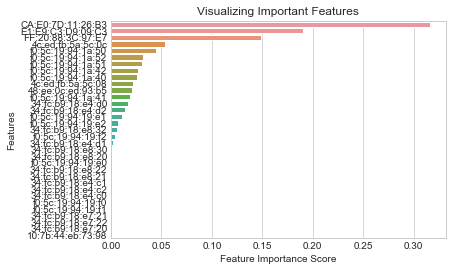

In [37]:
print("Feature Selection Computation")
random_forest_estimator = RandomForestRegressor()
main_estimator = make_pipeline(StandardScaler(),random_forest_estimator)
main_estimator.fit(X_train,train_Y)
display(random_forest_estimator.feature_importances_)
feature_imp = pd.Series(random_forest_estimator.feature_importances_,index=X_train.columns).sort_values(ascending=False)
display(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Training and Evaluation - KNN Regression Model

In [38]:
def compute_KNN_with_Regressor(flag=0,trainX_data = None,trainY_data = None,testX_data = None,testY_data = None,scaler = None,
                               cross_validation = None,n_neighbors=5,
                                weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1):
    # Init the KNN Regressor Estimator with the hyperparameters
    knn_regression_estimator = KNeighborsRegressor(n_neighbors,weights,algorithm,leaf_size,p,metric,metric_params,n_jobs)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,knn_regression_estimator)
    else:
        # Use SKLearn KNN Regression Default Estimator
        main_estimator = knn_regression_estimator
    if cross_validation is None:
        # Fit the training data
        main_estimator.fit(trainX_data,trainY_data)
        # Predict the results of the testing data features
        predict_test = main_estimator.predict(testX_data)
        # Compute Regression performance metrics
        coefficient_determination = sklearn.metrics.r2_score(testY_data,predict_test)
    else:
        # Fit and Predict the results of the testing data features using cross-validation
        if flag == 2:
            predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation)
        else:
            predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation,groups=default_groups)
        # Compute Regression performance metrics
        coefficient_determination = sklearn.metrics.r2_score(testY_data,predict_test)
    # Structure data to statistics
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = testY_data.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    return structure_data(result,coefficient_determination)

### Experiments

#### Check Training model with no cross validation
Use KNN Regressor to check the results on the training data alone

In [39]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    result = compute_KNN_with_Regressor(trainX_data=trainX_data,trainY_data=train_Y,
                                   testX_data=trainX_data,testY_data=train_Y,
                                   scaler=StandardScaler())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type
2,0.317262,0.414987,0.644195,0.561027,0.0,0.000000,0.400000,1.606848,0.0,3.111270,0.896253,Both
0,0.526011,0.880960,0.938595,0.777869,0.0,0.000000,0.721110,2.141449,0.0,4.000000,0.779760,WiFi
1,0.611932,0.718027,0.847365,0.586536,0.0,0.447214,0.824621,1.788854,0.0,2.973214,0.820493,BLE


#### Missing Values Filling Experiment
Fill in missing values and fix/remove outliers

In [40]:
final_results = list()
def compute_data_cleaning(dataset,feature,operation):
    if operation == 'Minimum':
        nan_filler = dataset[feature].min()*1.010
    elif operation == 'Median':
        nan_filler = dataset[feature].median()
    elif operation == 'Mean':
        nan_filler = dataset[feature].mean()
    elif operation == 'Maximum':
        nan_filler = dataset[feature].max()
    elif operation == 'Minimum Overall Dataset':
        numpy_arr_wifi=dataset.iloc[:,4:first_beacon_index].to_numpy()
        numpy_arr_ble=dataset.iloc[:,first_beacon_index:].to_numpy()
        nan_filler_wifi = np.nanmin(numpy_arr_wifi)*1.010
        nan_filler_ble = np.nanmin(numpy_arr_ble)*1.010
        print("MINIMUM WIFI: "+ str(nan_filler_wifi) + " AND MINIMUM BLE: "+ str(nan_filler_ble))
    elif operation == 'Median Overall Dataset':
        numpy_arr_wifi=dataset.iloc[:,4:first_beacon_index].to_numpy()
        numpy_arr_ble=dataset.iloc[:,first_beacon_index:].to_numpy()
        nan_filler_wifi = np.nanmedian(numpy_arr_wifi)*1.010
        nan_filler_ble = np.nanmedian(numpy_arr_ble)*1.010
        print("MINIMUM WIFI: "+ str(nan_filler_wifi) + " AND MINIMUM BLE: "+ str(nan_filler_ble))
    elif operation == 'Mean Overall Dataset':
        numpy_arr_wifi=dataset.iloc[:,4:first_beacon_index].to_numpy()
        numpy_arr_ble=dataset.iloc[:,first_beacon_index:].to_numpy()
        nan_filler_wifi = np.nanmean(numpy_arr_wifi)*1.010
        nan_filler_ble = np.nanmean(numpy_arr_ble)*1.010
        print("MINIMUM WIFI: "+ str(nan_filler_wifi) + " AND MINIMUM BLE: "+ str(nan_filler_ble))
    elif operation == 'Maximum Overall Dataset':
        numpy_arr_wifi=dataset.iloc[:,4:first_beacon_index].to_numpy()
        numpy_arr_ble=dataset.iloc[:,first_beacon_index:].to_numpy()
        nan_filler_wifi = np.nanmax(numpy_arr_wifi)*1.010
        nan_filler_ble = np.nanmax(numpy_arr_ble)*1.010
        print("MINIMUM WIFI: "+ str(nan_filler_wifi) + " AND MINIMUM BLE: "+ str(nan_filler_ble))
    # Fill Missing Values using column-based approach or entire dataset approach
    if feature is not None:
        dataset[feature] = dataset[feature].fillna(nan_filler) 
    else:
        dataset.iloc[:,first_beacon_index:] = dataset.iloc[:,first_beacon_index:].fillna(nan_filler_ble)
        dataset.iloc[:,4:first_beacon_index] = dataset.iloc[:,4:first_beacon_index].fillna(nan_filler_wifi)
    return dataset

In [41]:
dataset_cp = load_file('../radiomapBluetoothWiFiclassifier_university_dataset.csv')
dataset_cp = replace_features_nan(dataset_cp,4)
display(dataset_cp)

,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.0,-65.0,-63.0,-76.0,-78.0,-79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.0,-61.0,-62.0,-77.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.0,-62.0,-62.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.0,-61.0,-63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.0,-61.0,-63.0,-76.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-90.0,-89.0,NaN,NaN,NaN,-90.0,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-88.0,NaN,NaN,NaN,NaN,-90.0,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-89.0,-90.0,NaN,NaN,NaN,-90.0,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-91.0,-89.0,NaN,NaN,NaN,NaN,-93.0,-84.0,-93


In [42]:
types_cl=['Minimum','Median','Mean','Maximum',
          'Minimum Overall Dataset','Median Overall Dataset','Mean Overall Dataset','Maximum Overall Dataset']
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','nan_filler']
types = ['WiFi','BLE','Both']
results = list()
for feature_cl in types_cl:
    dataset_copy = dataset_cp.copy()
    print("FEATURE " + str(feature_cl))
    if 'Dataset' in feature_cl:
        dataset_copy = compute_data_cleaning(dataset_copy,None,feature_cl)
    else:
        for x in dataset_copy.iloc[:,4:]:
            dataset_copy = compute_data_cleaning(dataset_copy,x,feature_cl)
    train_wifi = dataset_copy.iloc[:,4:first_beacon_index]
    train_ble = dataset_copy.iloc[:,first_beacon_index:]
    X_train = dataset_copy.iloc[:,4:]
    for feature in types:
        #Decide on type of data
        if feature == 'WiFi':
            trainX_data = train_wifi
        elif feature == 'BLE':
            trainX_data = train_ble
        else:
            trainX_data = X_train 
        result = compute_KNN_with_Regressor(trainX_data=trainX_data,trainY_data=train_Y,
                                       testX_data=trainX_data,testY_data=train_Y,
                                       scaler=StandardScaler())
        result.append(feature)
        result.append(feature_cl)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_result = statistics.sort_values(by=['mae']).head(1).values[0]
final_results.append(final_result)

FEATURE Minimum
FEATURE Median
FEATURE Mean
FEATURE Maximum
FEATURE Minimum Overall Dataset
MINIMUM WIFI: -98.98 AND MINIMUM BLE: -102.01
FEATURE Median Overall Dataset
MINIMUM WIFI: -81.81 AND MINIMUM BLE: -86.86
FEATURE Mean Overall Dataset
MINIMUM WIFI: -80.21236766966834 AND MINIMUM BLE: -85.52009304603331
FEATURE Maximum Overall Dataset
MINIMUM WIFI: -48.480000000000004 AND MINIMUM BLE: -57.57


,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,nan_filler
5,0.167649,0.219147,0.468131,0.437373,0.0,0.000000,0.000000,1.200000,0.0,3.046309,0.945213,Both,Median
8,0.168652,0.224800,0.474131,0.443417,0.0,0.000000,0.000000,1.200000,0.0,3.046309,0.943800,Both,Mean
2,0.230479,0.294507,0.542685,0.491638,0.0,0.000000,0.000000,1.314184,0.0,3.538361,0.926373,Both,Minimum
17,0.231117,0.292160,0.540518,0.488942,0.0,0.000000,0.000000,1.273554,0.0,3.577709,0.926960,Both,Median Overall Dataset
20,0.249042,0.332053,0.576241,0.519992,0.0,0.000000,0.000000,1.407817,0.0,3.577709,0.916987,Both,Mean Overall Dataset
3,0.296096,0.470560,0.685974,0.619191,0.0,0.000000,0.000000,1.703516,0.0,3.720215,0.882360,WiFi,Median
11,0.312898,0.423413,0.650702,0.570914,0.0,0.000000,0.282843,1.600000,0.0,3.394113,0.894147,Both,Maximum
14,0.317262,0.414987,0.644195,0.561027,0.0,0.000000,0.400000,1.606848,0.0,3.111270,0.896253,Both,Minimum Overall Dataset
6,0.319796,0.518507,0.720074,0.645595,0.0,0.000000,0.000000,1.758079,0.0,3.720215,0.870373,WiFi,Mean
0,0.335203,0.521387,0.722071,0.639978,0.0,0.000000,0.400000,1.697056,0.0,3.841875,0.869653,WiFi,Minimum


#### Experiment - KNN with StratifiedKFold
Experiment using cross validation approach of StratifiedKFold

In [43]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','folds','type']
types = ['WiFi','BLE','Both']
cross_validation_list = np.arange(2,11)
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for cv in cross_validation_list:
        skf = StratifiedKFold(n_splits=cv)
        splited = skf.split(trainX_data,default_groups)
        result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
        result.append(cv)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_fold = statistics.sort_values(by=['mae'])['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,folds,type
26,0.594097,1.003360,1.001679,0.807017,0.000000,0.200000,0.800000,2.262742,0.0,4.123106,0.749160,10,Both
25,0.598812,0.995840,0.997918,0.798821,0.000000,0.282843,0.800000,2.236068,0.0,4.123106,0.751040,9,Both
24,0.609051,1.024160,1.012008,0.808757,0.000000,0.282843,0.800000,2.236068,0.0,4.123106,0.743960,8,Both
21,0.620774,1.046613,1.023041,0.813717,0.000000,0.282843,0.824621,2.236068,0.0,4.123106,0.738347,5,Both
23,0.622783,1.068747,1.033802,0.825710,0.000000,0.282843,0.824621,2.236068,0.0,4.326662,0.732813,7,Both
22,0.626435,1.077120,1.037844,0.828018,0.000000,0.282843,0.824621,2.250739,0.0,4.123106,0.730720,6,Both
20,0.651788,1.109707,1.053426,0.828127,0.000000,0.400000,0.894427,2.223920,0.0,4.123106,0.722573,4,Both
19,0.674869,1.135360,1.065533,0.825118,0.000000,0.400000,0.894427,2.408319,0.0,4.123106,0.716160,3,Both
18,0.755548,1.283253,1.132808,0.844601,0.000000,0.447214,1.131371,2.408319,0.0,4.123106,0.679187,2,Both
17,0.828417,1.213227,1.101466,0.726399,0.282843,0.632456,1.077033,2.223920,0.0,3.736308,0.696693,10,BLE


Number of Folds:  10


#### Experiment - KNN with HoldOut
Experiment using cross validation approach of HoldOut (Train test split)

In [44]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','test_size','type']
test_sizes =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train  
    for size in test_sizes:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = size, random_state = 42,stratify=default_groups)
        X_train_split = X_train_split.reset_index(drop=True)
        X_test_split = X_test_split.reset_index(drop=True)
        y_train_split = y_train_split.reset_index(drop=True)
        y_test_split = y_test_split.reset_index(drop=True)
        result = compute_KNN_with_Regressor(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
        result.append(size)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,test_size,type
19,0.552673,0.862933,0.928942,0.749151,0.000000,0.000000,0.800000,2.183499,0.0,2.607681,0.784267,0.2,Both
20,0.619298,0.959111,0.979342,0.760362,0.000000,0.200000,0.885247,2.192666,0.0,3.328663,0.760222,0.3,Both
18,0.644406,1.127467,1.061822,0.849607,0.000000,0.282843,0.824621,2.236068,0.0,4.219005,0.718133,0.1,Both
21,0.651174,0.980667,0.990286,0.747329,0.000000,0.400000,0.894427,2.165164,0.0,2.690725,0.754833,0.4,Both
22,0.707300,1.130453,1.063228,0.794900,0.000000,0.447214,0.894427,2.262742,0.0,4.219005,0.717387,0.5,Both
23,0.752169,1.190133,1.090932,0.791054,0.000000,0.565685,1.000000,2.262742,0.0,4.219005,0.702467,0.6,Both
1,0.817425,1.690933,1.300359,1.014699,0.000000,0.506450,1.063720,2.842534,0.0,4.472136,0.577267,0.2,WiFi
2,0.822213,1.624356,1.274502,0.975989,0.000000,0.447214,1.200000,2.760000,0.0,4.472136,0.593911,0.3,WiFi
24,0.824593,1.273371,1.128438,0.771071,0.200000,0.632456,1.077033,2.394843,0.0,4.219005,0.681657,0.7,Both
10,0.827930,1.254133,1.119881,0.756625,0.282843,0.632456,1.077033,2.404575,0.0,3.605551,0.686467,0.2,BLE


#### Experiment - KNN with Leave One Group Out
Experiment using cross validation approach of Leave One Group Out

In [45]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type']
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y,groups=default_groups)
    result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type
1,1.508733,2.752373,1.659028,0.690458,1.000000,1.414214,1.803323,2.720294,0.0,4.004997,0.311907,BLE
2,2.044652,4.952000,2.225309,0.878880,1.414214,2.000000,2.473863,3.605551,0.2,4.472136,-0.238000,Both
0,2.325732,6.374987,2.524874,0.983488,1.612452,2.236068,2.863564,3.969887,0.2,5.000000,-0.593747,WiFi


#### Evaluation Model Cross-Validation Experiment - Best cross-validation technique
Best parameters found using KNN

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,method,type
8,0.594097,1.003360,1.001679,0.807017,0.000000,0.200000,0.800000,2.262742,0.0,4.123106,0.749160,Stratified K-Fold,Both
7,0.619298,0.959111,0.979342,0.760362,0.000000,0.200000,0.885247,2.192666,0.0,3.328663,0.760222,HoldOut,Both
1,0.822213,1.624356,1.274502,0.975989,0.000000,0.447214,1.200000,2.760000,0.0,4.472136,0.593911,HoldOut,WiFi
5,0.828417,1.213227,1.101466,0.726399,0.282843,0.632456,1.077033,2.223920,0.0,3.736308,0.696693,Stratified K-Fold,BLE
2,0.843633,1.769600,1.330263,1.029221,0.000000,0.400000,1.216553,2.842534,0.0,4.882622,0.557600,Stratified K-Fold,WiFi
4,0.858188,1.367644,1.169463,0.796226,0.282843,0.632456,1.131371,2.382725,0.0,3.883298,0.658089,HoldOut,BLE
3,1.508733,2.752373,1.659028,0.690458,1.000000,1.414214,1.803323,2.720294,0.0,4.004997,0.311907,LOO,BLE
6,2.044652,4.952000,2.225309,0.878880,1.414214,2.000000,2.473863,3.605551,0.2,4.472136,-0.238000,LOO,Both
0,2.325732,6.374987,2.524874,0.983488,1.612452,2.236068,2.863564,3.969887,0.2,5.000000,-0.593747,LOO,WiFi


Selected cross validation method:  LOO


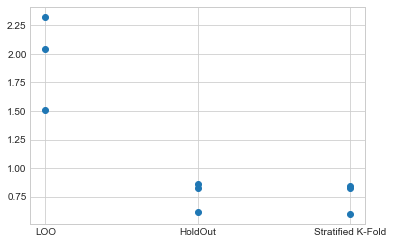

In [46]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','method','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
    X_train_split = X_train_split.reset_index(drop=True)
    X_test_split = X_test_split.reset_index(drop=True)
    y_train_split = y_train_split.reset_index(drop=True)
    y_test_split = y_test_split.reset_index(drop=True)
    holdout = compute_KNN_with_Regressor(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y,groups=default_groups)
    loo = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
    loo.append('LOO')
    loo.append(feature)
    results.append(loo)
    holdout.append('HoldOut')
    holdout.append(feature)
    results.append(holdout)
    skf = StratifiedKFold(n_splits=selected_fold)
    splited = skf.split(trainX_data,default_groups)
    skfold = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
    skfold.append('Stratified K-Fold')
    skfold.append(feature)
    results.append(skfold)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['method'],statistics['mae'],'o')
selected_method = 'LOO'
print("Selected cross validation method: ",selected_method)

#### Experiment - Best preprocessing technique
Experiment with the different preprocessing techniques

In [47]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','preprocessing','preprocessingFunc','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for preprocess in scaler:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups)
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=preprocess,cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=preprocess,cross_validation = splited)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_KNN_with_Regressor(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=preprocess)
        if(preprocess is None):
            regex = 'None'
        else:
            regex = re.search('(\w+)\(',str(preprocess)).group(1)
        result.append(regex)
        result.append(preprocess)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_preprocessing = statistics.sort_values(by=['mae'])['preprocessing'].head(1).values[0]
selected_preprocesssing_func = statistics.sort_values(by=['mae'])['preprocessingFunc'].head(1).values[0]
print("Selected Preprocessing: ",selected_preprocessing)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,preprocessing,preprocessingFunc,type
4,1.508733,2.752373,1.659028,0.690458,1.000000,1.414214,1.803323,2.720294,0.0,4.004997,0.311907,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",BLE
6,1.517113,2.776533,1.666293,0.689591,1.000000,1.414214,1.843909,2.785678,0.0,4.019950,0.305867,MaxAbsScaler,MaxAbsScaler(copy=True),BLE
7,1.522249,2.794187,1.671582,0.691073,1.000000,1.414214,1.843909,2.785678,0.2,4.019950,0.301453,None,None,BLE
5,1.523557,2.797867,1.672682,0.690852,1.004951,1.414214,1.843909,2.785678,0.0,4.019950,0.300533,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",BLE
8,2.044652,4.952000,2.225309,0.878880,1.414214,2.000000,2.473863,3.605551,0.2,4.472136,-0.238000,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",Both
9,2.134096,5.410880,2.326130,0.926099,1.414214,2.088061,2.630589,3.629810,0.2,4.770744,-0.352720,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",Both
11,2.171304,5.650933,2.377169,0.968309,1.414214,2.059126,2.672817,3.844736,0.2,5.000000,-0.412733,None,None,Both
10,2.191986,5.730133,2.393770,0.962584,1.442221,2.107045,2.785678,3.805260,0.2,5.000000,-0.432533,MaxAbsScaler,MaxAbsScaler(copy=True),Both
0,2.325732,6.374987,2.524874,0.983488,1.612452,2.236068,2.863564,3.969887,0.2,5.000000,-0.593747,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",WiFi
1,2.338078,6.374880,2.524852,0.953667,1.612452,2.280351,2.828427,3.883298,0.2,5.000000,-0.593720,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",WiFi


Selected Preprocessing:  StandardScaler


#### Experiment - Running the KNN function with the different weights

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,weights,type
2,1.508733,2.752373,1.659028,0.690458,1.000000,1.414214,1.803323,2.720294,0.000000,4.004997,0.311907,uniform,BLE
3,1.527404,2.831315,1.682651,0.706411,1.010062,1.401564,1.795294,2.949854,0.090315,4.007142,0.292171,distance,BLE
5,2.040059,4.933230,2.221088,0.878874,1.405431,2.000000,2.449872,3.605551,0.142404,4.472136,-0.233308,distance,Both
4,2.044652,4.952000,2.225309,0.878880,1.414214,2.000000,2.473863,3.605551,0.200000,4.472136,-0.238000,uniform,Both
1,2.319889,6.348553,2.519634,0.983848,1.597204,2.236068,2.863564,3.975011,0.123878,5.000000,-0.587138,distance,WiFi
0,2.325732,6.374987,2.524874,0.983488,1.612452,2.236068,2.863564,3.969887,0.200000,5.000000,-0.593747,uniform,WiFi


Selected weight:  uniform


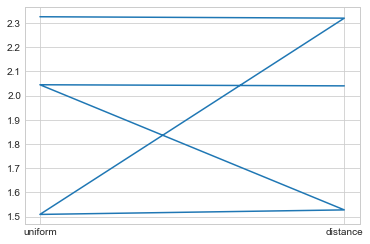

In [48]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','weights','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for weight in weights:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups)
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               weights=weight)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               weights=weight)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_KNN_with_Regressor(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                scaler=StandardScaler(),weights=weight)
        result.append(weight)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['weights'],statistics['mae'])
selected_weight = statistics.sort_values(by=['mae'])['weights'].head(1).values[0]
print("Selected weight: ",selected_weight)

#### Experiment - Running the KNN function with the different algorithms

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,algorithm,type
4,1.507362,2.752267,1.658996,0.693374,1.000000,1.414214,1.788854,2.756255,0.0,4.004997,0.311933,brute,BLE
5,1.508733,2.752373,1.659028,0.690458,1.000000,1.414214,1.803323,2.720294,0.0,4.004997,0.311907,kd_tree,BLE
7,1.508733,2.752373,1.659028,0.690458,1.000000,1.414214,1.803323,2.720294,0.0,4.004997,0.311907,auto,BLE
6,1.508736,2.751787,1.658851,0.690026,1.000000,1.414214,1.788854,2.720294,0.0,4.004997,0.312053,ball_tree,BLE
9,2.044652,4.952000,2.225309,0.878880,1.414214,2.000000,2.473863,3.605551,0.2,4.472136,-0.238000,kd_tree,Both
10,2.044652,4.952000,2.225309,0.878880,1.414214,2.000000,2.473863,3.605551,0.2,4.472136,-0.238000,ball_tree,Both
11,2.044652,4.952000,2.225309,0.878880,1.414214,2.000000,2.473863,3.605551,0.2,4.472136,-0.238000,auto,Both
8,2.051517,4.997173,2.235436,0.888539,1.414214,2.000000,2.473863,3.605551,0.2,4.882622,-0.249293,brute,Both
1,2.325732,6.374987,2.524874,0.983488,1.612452,2.236068,2.863564,3.969887,0.2,5.000000,-0.593747,kd_tree,WiFi
2,2.325732,6.374987,2.524874,0.983488,1.612452,2.236068,2.863564,3.969887,0.2,5.000000,-0.593747,ball_tree,WiFi


Selected algorithm:  brute


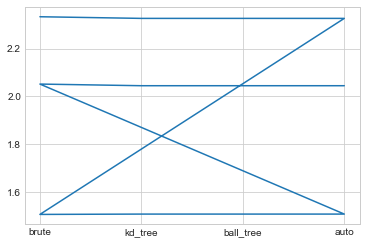

In [49]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','algorithm','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for algorithm in algorithms:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups)
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               algorithm=algorithm)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               algorithm=algorithm)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_KNN_with_Regressor(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                scaler=StandardScaler(),algorithm=algorithm)
        result.append(algorithm)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['algorithm'],statistics['mae'])
selected_algorithm = statistics.sort_values(by=['mae'])['algorithm'].head(1).values[0]
print("Selected algorithm: ",selected_algorithm)

#### Experiment - Running the KNN function with the different distance metrics

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,distance,type
5,1.499801,2.720160,1.649291,0.686575,1.000000,1.414214,1.811077,2.676555,0.000000,3.929377,0.319960,manhattan,BLE
4,1.508733,2.752373,1.659028,0.690458,1.000000,1.414214,1.803323,2.720294,0.000000,4.004997,0.311907,euclidean,BLE
7,1.510874,2.754613,1.659703,0.687389,1.000000,1.414214,1.843909,2.720294,0.000000,3.929377,0.311347,braycurtis,BLE
6,1.546105,2.889707,1.699914,0.707059,1.019804,1.414214,1.856775,2.884441,0.000000,4.004997,0.277573,canberra,BLE
8,2.044652,4.952000,2.225309,0.878880,1.414214,2.000000,2.473863,3.605551,0.200000,4.472136,-0.238000,euclidean,Both
9,2.135523,5.393707,2.322436,0.913433,1.414214,2.000000,2.600000,3.605551,0.282843,4.686150,-0.348427,manhattan,Both
11,2.150723,5.490720,2.343229,0.930735,1.414214,2.088061,2.630589,3.676955,0.200000,4.404543,-0.372680,braycurtis,Both
10,2.210958,5.856160,2.419950,0.984438,1.442221,2.126029,2.778489,3.899346,0.200000,5.000000,-0.464040,canberra,Both
0,2.325732,6.374987,2.524874,0.983488,1.612452,2.236068,2.863564,3.969887,0.200000,5.000000,-0.593747,euclidean,WiFi
3,2.353359,6.514240,2.552301,0.988557,1.649242,2.249405,2.952965,4.000000,0.200000,4.720169,-0.628560,braycurtis,WiFi


Selected distance:  manhattan


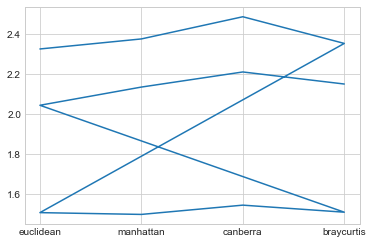

In [50]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','distance','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for distance in distance_metris:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups)
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               metric=distance)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               metric=distance)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_KNN_with_Regressor(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                scaler=StandardScaler(),metric=distance)
        result.append(distance)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['distance'],statistics['mae'])
selected_distance = statistics.sort_values(by=['mae'])['distance'].head(1).values[0]
print("Selected distance: ",selected_distance)

#### Experiment - Filter Data
Experiment using filter approaches

In [51]:
def apply_filter():
    statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','filter']
    results = list()
    for filterelement in filters:
        if filterelement == 'Median':
            result = apply_median_filter()
        elif filterelement == 'Mean':
            result = apply_mean_filter()
        else:
            result = compute_KNN_with_Regressor(trainX_data=X_train,trainY_data=train_Y,testX_data=X_train,
                                                testY_data=train_Y,
                                            scaler=StandardScaler())
            result.append('No Filter')
        results.append(result)
    statistics = pd.DataFrame(columns=statistical_cols,data=results)
    display(statistics.sort_values(by=['mae']))
    plt.plot(statistics['filter'],statistics['mae'])
    selected_filter = statistics.sort_values(by=['mae'])['filter'].head(1).values[0]
    print("Selected Filter: ",selected_filter)
    return selected_filter
            

def apply_median_filter():
    medians = list()
    aps = ['coordinate_X','coordinate_Y']
    for col in X_train.columns: 
         aps.append(col)
    print("COLUMNS OF DATAFRAME")
    display(aps)
    for rp, access_points in reference_points:
        x = rp[0]
        y = rp[1]
        medians_list = [x,y]
        for ap in X_train:
            median = access_points[ap].median()
            medians_list.append(median)
        medians.append(medians_list)
    median_pd = pd.DataFrame(medians,columns = aps)
    display(median_pd)
    default_groups = median_pd["coordinate_X"].map(str)+","+median_pd["coordinate_Y"].map(str)
    x_train = median_pd.iloc[:,2:]
    y_train = median_pd.iloc[:,:2]
    nan_filler = x_train.min().min()*1.010
    x_train = x_train.fillna(nan_filler)
    result = compute_KNN_with_Regressor(flag=2,trainX_data=x_train,trainY_data=y_train,testX_data=x_train,testY_data=y_train,
                                            scaler=StandardScaler())
    result.append('Median')
    return result

def apply_mean_filter(): 
    means = list()
    aps = ['coordinate_X','coordinate_Y']
    for col in X_train.columns: 
         aps.append(col)
    for rp, access_points in reference_points:
        x = rp[0]
        y = rp[1]
        means_list = [x,y]
        for ap in X_train:
            mean = access_points[ap].mean()
            means_list.append(mean)
        means.append(means_list)
    mean_pd = pd.DataFrame(means,columns = aps)
    default_groups = mean_pd["coordinate_X"].map(str)+","+mean_pd["coordinate_Y"].map(str)
    x_train = mean_pd.iloc[:,2:]
    y_train = mean_pd.iloc[:,:2]
    nan_filler = x_train.min().min()*1.010
    x_train = x_train.fillna(nan_filler)
    result = compute_KNN_with_Regressor(flag=2,trainX_data=x_train,trainY_data=y_train,testX_data=x_train,testY_data=y_train,
                                            scaler=StandardScaler())
    result.append('Mean')
    return result

COLUMNS OF DATAFRAME


['coordinate_X',
 'coordinate_Y',
 'f0:5c:19:94:1a:40',
 'f0:5c:19:94:1a:41',
 'f0:5c:19:94:1a:42',
 '34:fc:b9:18:e4:c1',
 '34:fc:b9:18:e4:c0',
 '34:fc:b9:18:e4:c2',
 'f0:5c:19:94:1a:50',
 'f0:5c:19:94:1a:51',
 'f0:5c:19:94:1a:52',
 '4c:ed:fb:5a:5c:0c',
 '4c:ed:fb:5a:5c:08',
 'f0:5c:19:94:19:e1',
 'f0:5c:19:94:19:e2',
 '34:fc:b9:18:e8:21',
 '34:fc:b9:18:e8:22',
 '34:fc:b9:18:e8:20',
 'f0:5c:19:94:19:e0',
 '34:fc:b9:18:e4:d2',
 '48:ee:0c:ed:93:b5',
 '34:fc:b9:18:e4:d0',
 '34:fc:b9:18:e4:d1',
 '34:fc:b9:18:e8:30',
 '34:fc:b9:18:e8:32',
 '10:7b:44:eb:73:98',
 'f0:5c:19:94:19:f2',
 'f0:5c:19:94:19:f0',
 '34:fc:b9:18:e7:21',
 '34:fc:b9:18:e7:22',
 '34:fc:b9:18:e7:20',
 'f0:5c:19:94:19:f1',
 'E1:E9:C3:D9:09:C3',
 'FF:20:88:3C:97:E7',
 'CA:E0:7D:11:26:B3']

,coordinate_X,coordinate_Y,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-2.0,-1.0,-69.00,-66.00,-69.00,-85.00,-98.98,-91.50,-83.00,-83.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-62.0,-102.01,-88.0
1,-2.0,0.0,-67.00,-68.00,-68.00,-98.98,-98.98,-98.98,-78.00,-78.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-69.0,-93.00,-80.0
2,-2.0,1.0,-64.00,-63.00,-63.00,-98.98,-98.98,-98.98,-80.00,-80.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-79.0,-102.01,-80.0
3,-2.0,2.0,-68.00,-68.00,-67.00,-98.98,-98.98,-98.98,-82.00,-82.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-87.5,-74.00,-89.0
4,-2.0,3.0,-68.00,-69.00,-68.00,-98.98,-98.98,-98.98,-80.00,-80.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-89.5,-58.00,-94.0
5,-1.0,-1.0,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.00,-72.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-78.0,-102.01,-81.5
6,-1.0,0.0,-72.00,-68.00,-71.00,-77.00,-77.50,-80.00,-75.00,-76.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-77.0,-88.50,-85.0
7,-1.0,1.0,-61.00,-63.00,-61.00,-98.98,-98.98,-98.98,-81.00,-81.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-84.0,-83.00,-95.0
8,-1.0,2.0,-65.00,-65.00,-64.00,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-88.0,-75.50,-88.0
9,-1.0,3.0,-65.00,-59.00,-64.50,-98.98,-98.98,-98.98,-82.00,-82.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-87.0,-76.00,-90.0


,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,filter
2,0.434875,0.597653,0.773080,0.639596,0.000000,0.000000,0.565685,1.788854,0.000000,3.298485,0.850587,No Filter
1,1.619751,3.094400,1.759091,0.700303,1.216553,1.523155,1.835127,2.672743,0.282843,2.973214,0.226400,Mean
0,1.699238,3.376000,1.837389,0.713405,1.414214,1.811077,2.132660,2.772515,0.282843,3.052868,0.156000,Median


Selected Filter:  No Filter


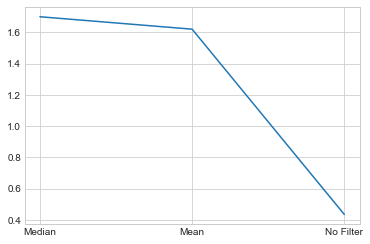

In [52]:
selected_filter = apply_filter()

#### Experiment - Tuning the K parameter

{'knn__n_neighbors': 9}
Max accuracy:  -1.376814814814815
{'knn__n_neighbors': 10}
Max accuracy:  -0.9251333333333334
{'knn__n_neighbors': 5}
Max accuracy:  -1.2017333333333335


,n_neighbhors,type
0,9,WiFi
1,10,BLE
2,5,Both


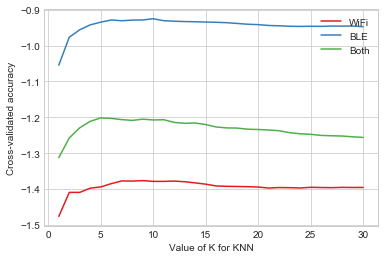

In [53]:
statistical_cols = ['n_neighbhors','type']
types = ['WiFi','BLE','Both']
results = list()
num = 0
palette = plt.get_cmap('Set1')
grid_results = list()
k_range = list(range(1, 31))
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    result = list()
    knn_regressor_estimator = KNeighborsRegressor() #init knn regressor estimator
    param_grid = {'knn__n_neighbors': k_range}
    # Create a pipeline
    pipe = Pipeline([('standardizer', StandardScaler()), ('knn', knn_regressor_estimator)])
    estimator = GridSearchCV(pipe, param_grid,cv=selected_fold,scoring=sklearn.metrics.make_scorer(sklearn.metrics.mean_absolute_error,
                                                        greater_is_better=False,
                                                        multioutput="uniform_average"))
    #fit model to data
    estimator.fit(trainX_data,train_Y)
    print(estimator.best_params_)
    grid_mean_scores = estimator.cv_results_['mean_test_score']
    print('Max accuracy: ', max(grid_mean_scores))
    grid_result = [grid_mean_scores]
    result.append(estimator.best_params_['knn__n_neighbors'])
    result.append(feature)
    results.append(result)
    grid_results.append(grid_result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics)
for grid in grid_results:
    plt.plot(k_range, grid[0],color=palette(num),label=types[num])
    num+=1
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.legend(loc='upper right')
plt.show()

#### Run RandomizedSearchCV for parameter tunning¶

In [54]:
types = ['WiFi','BLE','Both']
results = list()
num = 0
palette = plt.get_cmap('Set1')
grid_results = list()
k_range = list(range(1, 31))
tuned_parameters = {
    'knn__n_neighbors': k_range,
    'knn__metric':distance_metris,
    'knn__weights':weights,
    'knn__algorithm':['auto']
}
scores = ['r2']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    for feature in types:
        #Decide on type of data
        if feature == 'WiFi':
            trainX_data = train_wifi
        elif feature == 'BLE':
            trainX_data = train_ble
        else:
            trainX_data = X_train  
        pipe = Pipeline([('standardizer', StandardScaler()), ('knn', KNeighborsRegressor())])
        clf = RandomizedSearchCV(pipe, tuned_parameters,n_iter=100,cv=StratifiedKFold(n_splits=selected_fold, shuffle=True, random_state=42).split(trainX_data, default_groups),scoring=score,verbose=1
        )
        clf.fit(trainX_data,train_Y)
        clf.best_params_['score'] = score
        clf.best_params_['best_score'] = clf.best_score_
        clf.best_params_['type'] = feature
        results.append(clf.best_params_)
gridcv_results = pd.DataFrame(results).sort_values(by=['best_score'],ascending=False)
display(gridcv_results)

# Tuning hyper-parameters for r2

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   13.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   13.8s finished


,knn__weights,knn__n_neighbors,knn__metric,knn__algorithm,score,best_score,type
2,distance,4,canberra,auto,r2,0.941586,Both
0,distance,3,canberra,auto,r2,0.851244,WiFi
1,uniform,4,braycurtis,auto,r2,0.724396,BLE


### Best Parameters
Display the best parameters tunned throughout the experiments

In [55]:
conclusion_cols=['K Parameter','Cross Validation','Weight','Preprocessing','Algorithm','Distance']
conclusion_list = [10,selected_method,selected_weight,selected_preprocessing,selected_algorithm,selected_distance]
conclusion_pd = pd.DataFrame([conclusion_list],columns= conclusion_cols)
display(conclusion_pd)

,K Parameter,Cross Validation,Weight,Preprocessing,Algorithm,Distance
0,10,LOO,uniform,StandardScaler,brute,manhattan


### Best Results

In [56]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tunning']
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(trainX_data,train_Y,groups=default_groups)
        result = compute_KNN_with_Regressor(flag=1,n_neighbors=10,testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                            metric=selected_distance,
                             weights=selected_weight)
    elif selected_method =='Stratified K-Fold':
        skf = StratifiedKFold(n_splits=selected_fold)
        splited = skf.split(trainX_data,default_groups)
        result = compute_KNN_with_Regressor(flag=1,n_neighbors=10,testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),
                                             cross_validation = splited,
                            metric=selected_distance,
                             weights=selected_weight)  
    else:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
        X_train_split = X_train_split.reset_index(drop=True)
        X_test_split = X_test_split.reset_index(drop=True)
        y_train_split = y_train_split.reset_index(drop=True)
        y_test_split = y_test_split.reset_index(drop=True)
        result = compute_KNN_with_Regressor(flag=1,n_neighbors=4,trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                             scaler=StandardScaler(),metric=selected_distance,
                             weights=selected_weight)  
    result.append(feature)
    result.append(True)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tunning
1,1.462987,2.570427,1.603255,0.656254,1.000000,1.345362,1.802776,2.597401,0.100000,3.736308,0.357393,BLE,True
2,2.066756,5.036760,2.244273,0.875385,1.400892,2.045718,2.617250,3.466338,0.141421,4.301163,-0.259190,Both,True
0,2.282003,6.155627,2.481054,0.974349,1.500000,2.241644,2.956686,3.804930,0.100000,4.640043,-0.538907,WiFi,True


### Best Result - Testing (Home | BLE)

In [57]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tuning']
results = list()
tuning =[True,False]
trainX_data = train_ble
testX_data = test_ble_X
scaler = StandardScaler()
scaler.fit(trainX_data)
testX_data = scaler.transform(testX_data)
for tune in tuning:
    if tune == True:
        model = KNeighborsRegressor(n_neighbors=10,metric=selected_distance,algorithm=selected_algorithm,
                             weights=selected_weight)
    else: 
        model = KNeighborsRegressor()
    trainX_data = scaler.transform(trainX_data)
    model.fit(trainX_data,train_Y)
    predict_test = model.predict(testX_data)
    coefficient_determination = sklearn.metrics.r2_score(test_ble_Y,predict_test)
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = test_ble_Y.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    data = structure_data(result,coefficient_determination)
    data.append(None)
    data.append(tune)
    results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tuning
0,2.546246,8.136692,2.852489,1.290791,1.264911,2.647640,3.275930,4.664762,0.360555,5.522681,-4.602711,None,True
1,3.917835,16.086923,4.010851,0.862097,3.189044,3.862642,4.518849,5.456189,2.523886,5.456189,-10.491679,None,False


### Best Result - Testing (Home | BLE)

In [58]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tuning']
results = list()
tuning =[True,False]
trainX_data = train_ble
testX_data = test_ble_home_X
scaler = StandardScaler()
scaler.fit(trainX_data)
testX_data = scaler.transform(testX_data)
for tune in tuning:
    if tune == True:
        model = KNeighborsRegressor(n_neighbors=10,metric=selected_distance,algorithm=selected_algorithm,
                             weights=selected_weight)
    else: 
        model = KNeighborsRegressor()
    trainX_data = scaler.transform(trainX_data)
    model.fit(trainX_data,train_Y)
    predict_test = model.predict(testX_data)
    coefficient_determination = sklearn.metrics.r2_score(test_ble_home_Y,predict_test)
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = test_ble_home_Y.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    data = structure_data(result,coefficient_determination)
    data.append(None)
    data.append(tune)
    results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tuning
0,2.182494,6.198923,2.489764,1.202818,1.204159,2.012461,2.630007,4.431989,0.447214,5.122499,-3.484101,None,True
1,3.910311,16.025385,4.003172,0.860549,3.189044,3.862642,4.606517,5.326350,2.523886,5.456189,-10.436942,None,False


### Best Result - Missing Values Filling Experiment
Fill in missing values and fix/remove outliers

In [59]:
def compute_data_cleaning(dataset,feature,operation):
    if operation == 'Minimum':
        nan_filler = dataset[feature].min()*1.010
    elif operation == 'Median':
        nan_filler = dataset[feature].median()
    elif operation == 'Mean':
        nan_filler = dataset[feature].mean()
    elif operation == 'Maximum':
        nan_filler = dataset[feature].max()
    elif operation == 'Minimum Overall Dataset':
        numpy_arr_wifi=dataset.iloc[:,4:first_beacon_index].to_numpy()
        numpy_arr_ble=dataset.iloc[:,first_beacon_index:].to_numpy()
        nan_filler_wifi = np.nanmin(numpy_arr_wifi)*1.010
        nan_filler_ble = np.nanmin(numpy_arr_ble)*1.010
        print("MINIMUM WIFI: "+ str(nan_filler_wifi) + " AND MINIMUM BLE: "+ str(nan_filler_ble))
    elif operation == 'Median Overall Dataset':
        numpy_arr_wifi=dataset.iloc[:,4:first_beacon_index].to_numpy()
        numpy_arr_ble=dataset.iloc[:,first_beacon_index:].to_numpy()
        nan_filler_wifi = np.nanmedian(numpy_arr_wifi)*1.010
        nan_filler_ble = np.nanmedian(numpy_arr_ble)*1.010
        print("MINIMUM WIFI: "+ str(nan_filler_wifi) + " AND MINIMUM BLE: "+ str(nan_filler_ble))
    elif operation == 'Mean Overall Dataset':
        numpy_arr_wifi=dataset.iloc[:,4:first_beacon_index].to_numpy()
        numpy_arr_ble=dataset.iloc[:,first_beacon_index:].to_numpy()
        nan_filler_wifi = np.nanmean(numpy_arr_wifi)*1.010
        nan_filler_ble = np.nanmean(numpy_arr_ble)*1.010
        print("MINIMUM WIFI: "+ str(nan_filler_wifi) + " AND MINIMUM BLE: "+ str(nan_filler_ble))
    elif operation == 'Maximum Overall Dataset':
        numpy_arr_wifi=dataset.iloc[:,4:first_beacon_index].to_numpy()
        numpy_arr_ble=dataset.iloc[:,first_beacon_index:].to_numpy()
        nan_filler_wifi = np.nanmax(numpy_arr_wifi)*1.010
        nan_filler_ble = np.nanmax(numpy_arr_ble)*1.010
        print("MINIMUM WIFI: "+ str(nan_filler_wifi) + " AND MINIMUM BLE: "+ str(nan_filler_ble))
    # Fill Missing Values using column-based approach or entire dataset approach
    if feature is not None:
        dataset[feature] = dataset[feature].fillna(nan_filler) 
    else:
        dataset.iloc[:,first_beacon_index:] = dataset.iloc[:,first_beacon_index:].fillna(nan_filler_ble)
        dataset.iloc[:,4:first_beacon_index] = dataset.iloc[:,4:first_beacon_index].fillna(nan_filler_wifi)
    return dataset

In [60]:
dataset_cp = load_file('../radiomapBluetoothWiFiclassifier_university_dataset.csv')
dataset_cp = replace_features_nan(dataset_cp,4)
display(dataset_cp)

,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.0,-65.0,-63.0,-76.0,-78.0,-79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.0,-61.0,-62.0,-77.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.0,-62.0,-62.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.0,-61.0,-63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.0,-61.0,-63.0,-76.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-90.0,-89.0,NaN,NaN,NaN,-90.0,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-88.0,NaN,NaN,NaN,NaN,-90.0,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-89.0,-90.0,NaN,NaN,NaN,-90.0,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-91.0,-89.0,NaN,NaN,NaN,NaN,-93.0,-84.0,-93


In [61]:
types_cl=['Minimum','Median','Mean','Maximum',
          'Minimum Overall Dataset','Median Overall Dataset','Mean Overall Dataset','Maximum Overall Dataset']
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','nan_filler']
types = ['WiFi','BLE','Both']
results = list()
for feature_cl in types_cl:
    dataset_copy = dataset_cp.copy()
    print("FEATURE " + str(feature_cl))
    if 'Dataset' in feature_cl:
        dataset_copy = compute_data_cleaning(dataset_copy,None,feature_cl)
    else:
        for x in dataset_copy.iloc[:,4:]:
            dataset_copy = compute_data_cleaning(dataset_copy,x,feature_cl)
    train_wifi = dataset_copy.iloc[:,4:first_beacon_index]
    train_ble = dataset_copy.iloc[:,first_beacon_index:]
    X_train = dataset_copy.iloc[:,4:]
    for feature in types:
        #Decide on type of data
        if feature == 'WiFi':
            trainX_data = train_wifi
        elif feature == 'BLE':
            trainX_data = train_ble
        else:
            trainX_data = X_train 
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups)
            result = compute_KNN_with_Regressor(flag=1,n_neighbors=10,testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                metric=selected_distance,
                                 weights=selected_weight)
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_KNN_with_Regressor(flag=1,n_neighbors=10,testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),
                                                 cross_validation = splited,
                                metric=selected_distance,
                                 weights=selected_weight)  
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_KNN_with_Regressor(flag=1,n_neighbors=4,trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(),metric=selected_distance,
                                 weights=selected_weight)
        result.append(feature)
        result.append(feature_cl)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_result = statistics.sort_values(by=['mae']).head(1).values[0]
final_results.append(final_result)

FEATURE Minimum
FEATURE Median
FEATURE Mean
FEATURE Maximum
FEATURE Minimum Overall Dataset
MINIMUM WIFI: -98.98 AND MINIMUM BLE: -102.01
FEATURE Median Overall Dataset
MINIMUM WIFI: -81.81 AND MINIMUM BLE: -86.86
FEATURE Mean Overall Dataset
MINIMUM WIFI: -80.21236766966834 AND MINIMUM BLE: -85.52009304603331
FEATURE Maximum Overall Dataset
MINIMUM WIFI: -48.480000000000004 AND MINIMUM BLE: -57.57


,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,nan_filler
16,1.406426,2.406147,1.551176,0.654739,0.957734,1.236932,1.700000,2.628021,0.100000,3.517101,0.398463,BLE,Median Overall Dataset
13,1.408057,2.392467,1.546760,0.640616,0.984886,1.276709,1.702939,2.549510,0.000000,3.736308,0.401883,BLE,Minimum Overall Dataset
7,1.408235,2.423627,1.556800,0.664146,0.921954,1.264911,1.755254,2.600000,0.100000,3.417601,0.394093,BLE,Mean
4,1.408468,2.427053,1.557900,0.666231,0.948683,1.280625,1.700882,2.663263,0.100000,3.511410,0.393237,BLE,Median
19,1.410470,2.420427,1.555772,0.656945,0.948683,1.236932,1.746425,2.628021,0.100000,3.417601,0.394893,BLE,Mean Overall Dataset
1,1.416825,2.434547,1.560303,0.654005,0.984886,1.276709,1.704697,2.580264,0.000000,3.736308,0.391363,BLE,Minimum
22,1.462987,2.570427,1.603255,0.656254,1.000000,1.345362,1.802776,2.597401,0.100000,3.736308,0.357393,BLE,Maximum Overall Dataset
10,1.465887,2.578533,1.605781,0.655958,1.000000,1.352755,1.802776,2.588137,0.100000,3.736308,0.355367,BLE,Maximum
5,2.002174,4.794387,2.189609,0.886981,1.414214,2.000000,2.346269,3.632621,0.000000,4.301163,-0.198597,Both,Median
17,2.002829,4.903840,2.214462,0.945361,1.303840,1.877475,2.534551,3.605551,0.100000,4.118252,-0.225960,Both,Median Overall Dataset


### Results Display

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tuning
0,0.167649,0.219147,0.468131,0.437373,0.000000,0.000000,0.000000,1.200000,0.000000,3.046309,0.945213,Both,Median
4,1.406426,2.406147,1.551176,0.654739,0.957734,1.236932,1.700000,2.628021,0.100000,3.517101,0.398463,BLE,Median Overall Dataset
1,1.462987,2.570427,1.603255,0.656254,1.000000,1.345362,1.802776,2.597401,0.100000,3.736308,0.357393,BLE,True
3,2.182494,6.198923,2.489764,1.202818,1.204159,2.012461,2.630007,4.431989,0.447214,5.122499,-3.484101,None,True
2,2.546246,8.136692,2.852489,1.290791,1.264911,2.647640,3.275930,4.664762,0.360555,5.522681,-4.602711,None,True


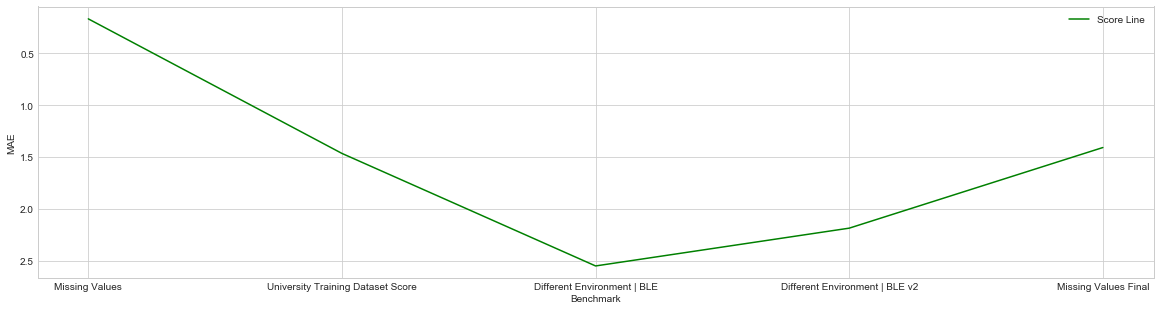

In [62]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tuning']
types = ['Missing Values','University Training Dataset Score','Different Environment | BLE','Different Environment | BLE v2','Missing Values Final']
results = pd.DataFrame(data=final_results,columns=statistical_cols)
display(results.sort_values(by=['mae']))
plt.figure(figsize=(20,5))
plt.plot(types,results['mae'],color='green',label='Score Line')
plt.xlabel('Benchmark')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.show()